Last updated: 15 Feb 2023

# 👋 PyCaret Anomaly Detection Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
# check installed version
!pip install pycaret[full]
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret’s Anomaly Detection Module is an unsupervised machine learning module that is used for identifying rare items, events, or observations that raise suspicions by differing significantly from the majority of the data.

Typically, the anomalous items will translate to some kind of problems such as bank fraud, a structural defect, medical problems, or errors.

PyCaret's Anomaly Detection module provides several pre-processing features to prepare the data for modeling through the `setup` function. It has over 10 ready-to-use algorithms and few plots to analyze the performance of trained models.

A typical workflow in PyCaret's unsupervised module consist of following 6 steps in this order:

**Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## Setup
This function initializes the training environment and creates the transformation pipeline. The setup function must be called before executing any other function. It takes one mandatory parameter only: data. All the other parameters are optional.

In [3]:
# import pycaret anomaly and init setup
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1070, 19)"
2,Transformed data shape,"(1070, 19)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed data shape:**  Shape of data after transformations <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [4]:
# import AnomalyExperiment and init the class
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

In [6]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1070, 19)"
2,Transformed data shape,"(1070, 19)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Create Model

This function trains an unsupervised anomaly detection model. All the available models can be accessed using the models function.

In [7]:
# train iforest model
iforest = create_model('iforest')
iforest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [8]:
# to check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


## Assign Model
This function assigns anomaly labels to the training data, given a trained model.

In [9]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,...,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Anomaly,Anomaly_Score
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,...,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0,-0.153794
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,...,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,0,-0.081573
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,...,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0,-0.083712
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,...,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,0,-0.078466
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,...,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0,-0.026453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,...,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,0,-0.128892
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,...,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,0,-0.171309
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,...,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,0,-0.135144
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,...,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,0,-0.125469


## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [10]:
# tsne plot anomalies
plot_model(iforest, plot = 'tsne')

In [11]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [12]:
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `Anomaly` and `Anomaly_Score` label as a new column in the input dataframe. This step may or may not be needed depending on the use-case. Some times clustering models are trained for analysis purpose only and the interest of user is only in assigned labels on the training dataset, that can be done using `assign_model` function. `predict_model` is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model).

In [13]:
# predict on test set
iforest_pred = predict_model(iforest, data=data)
iforest_pred

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,...,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Anomaly,Anomaly_Score
0,1.0,0.0,237.0,1.0,1.75,1.99,0.00,0.00,0.0,0.0,...,1.99,1.75,0.24,0.0,0.000000,0.000000,0.24,1.0,0,-0.153794
1,2.0,0.0,239.0,1.0,1.75,1.99,0.00,0.30,0.0,1.0,...,1.69,1.75,-0.06,0.0,0.150754,0.000000,0.24,1.0,0,-0.081573
2,3.0,0.0,245.0,1.0,1.86,2.09,0.17,0.00,0.0,0.0,...,2.09,1.69,0.40,0.0,0.000000,0.091398,0.23,1.0,0,-0.083712
3,4.0,1.0,227.0,1.0,1.69,1.69,0.00,0.00,0.0,0.0,...,1.69,1.69,0.00,0.0,0.000000,0.000000,0.00,1.0,0,-0.078466
4,5.0,0.0,228.0,7.0,1.69,1.69,0.00,0.00,0.0,0.0,...,1.69,1.69,0.00,1.0,0.000000,0.000000,0.00,0.0,0,-0.026453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066.0,0.0,252.0,7.0,1.86,2.09,0.10,0.00,0.0,0.0,...,2.09,1.76,0.33,1.0,0.000000,0.053763,0.23,0.0,0,-0.128892
1066,1067.0,0.0,256.0,7.0,1.86,2.18,0.00,0.00,0.0,0.0,...,2.18,1.86,0.32,1.0,0.000000,0.000000,0.32,0.0,0,-0.171309
1067,1068.0,1.0,257.0,7.0,1.86,2.18,0.00,0.00,0.0,0.0,...,2.18,1.86,0.32,1.0,0.000000,0.000000,0.32,0.0,0,-0.135144
1068,1069.0,0.0,261.0,7.0,1.86,2.13,0.00,0.24,0.0,0.0,...,1.89,1.86,0.03,1.0,0.112676,0.000000,0.27,0.0,0,-0.125469


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [14]:
# save pipeline
save_model(iforest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'WeekofPurchase', 'StoreID',
                                              'PriceCH', 'PriceMM', 'DiscCH',
                                              'DiscMM', 'SpecialCH', 'SpecialMM',
                                              'LoyalCH', 'SalePriceMM',
                                              'SalePriceCH', 'PriceDiff',
                                              'PctDiscMM', 'PctDiscCH',
                                              'ListPriceDiff', 'STORE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  Transforme...
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Purchase',
                                                              

In [15]:
# load pipeline
loaded_iforest_pipeline = load_model('iforest_pipeline')
loaded_iforest_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'SpecialMM',
                                             'LoyalCH', 'SalePriceMM',
                                             'SalePriceCH', 'PriceDiff',
                                             'PctDiscMM', 'PctDiscCH',
                                             'ListPriceDiff', 'STORE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer'...
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Purchase',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': CH     0
MM     1
NaN   -1
dtype: int64},
                                                                        {'col': 'Store7',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': No     0
Yes    1
NaN   -1
dtype: int64}]))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the training environment and creates the transformation pipeline. The setup function must be called before executing any other function. It takes one mandatory parameter only: data. All the other parameters are optional.

In [16]:
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1070, 19)"
2,Transformed data shape,"(1070, 19)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [17]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [18]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1.0,0.0,237.0,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,0.0,0.000000,0.000000,0.24,1.0
1,2.0,0.0,239.0,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,0.0,0.150754,0.000000,0.24,1.0
2,3.0,0.0,245.0,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,0.0,0.000000,0.091398,0.23,1.0
3,4.0,1.0,227.0,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,0.0,0.000000,0.000000,0.00,1.0
4,5.0,0.0,228.0,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,1.0,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066.0,0.0,252.0,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,1.0,0.000000,0.053763,0.23,0.0
1066,1067.0,0.0,256.0,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,1.0,0.000000,0.000000,0.32,0.0
1067,1068.0,1.0,257.0,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,1.0,0.000000,0.000000,0.32,0.0
1068,1069.0,0.0,261.0,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,1.0,0.112676,0.000000,0.27,0.0


In [19]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [20]:
# help(setup)

In [22]:
# init setup with bin_numeric_feature

s = setup(data, session_id = 123,
          bin_numeric_features=['WeekofPurchase'])

,Description,Value
0,Session id,123
1,Original data shape,"(1070, 19)"
2,Transformed data shape,"(1070, 19)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


<Axes: >

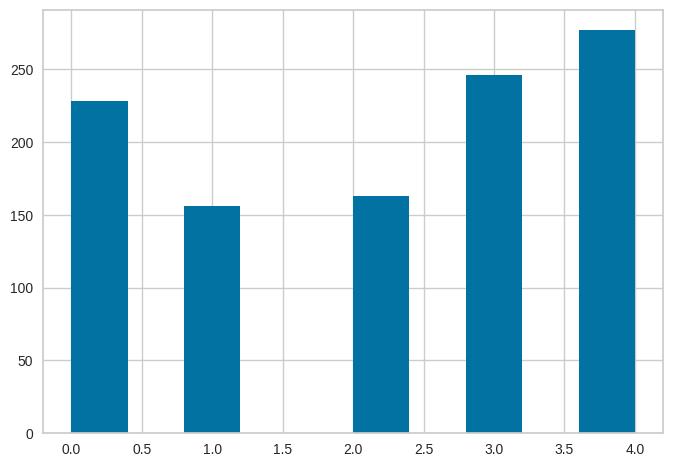

In [24]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['WeekofPurchase'].hist()

Notice that `Col1` originally was a numeric feature with a continuous distribution. After transformation it is now converted into categorical feature. We can also access non-transformed values using `get_config` and then compare the differences.

<Axes: >

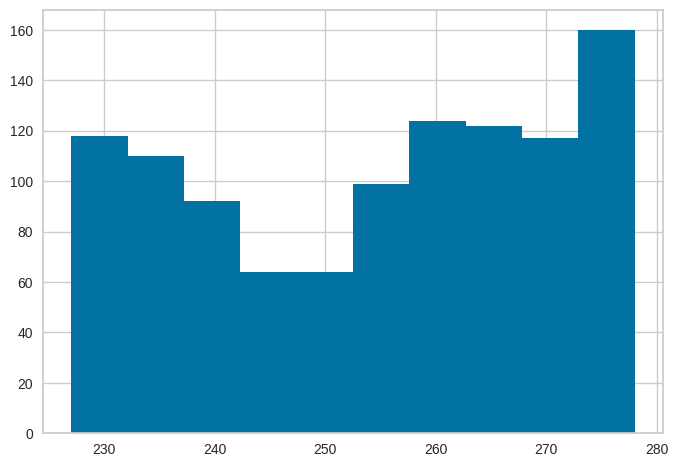

In [25]:
get_config('X_train')['WeekofPurchase'].hist()

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [26]:
# from pycaret.anomaly import *
# s = setup(data, session_id = 123, log_experiment='mlflow', experiment_name='anomaly_project')

In [27]:
# train iforest
# iforest = create_model('iforest')

In [28]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [29]:
# help(setup)

## ✅ Create Model
This function trains an unsupervised anomaly detection model. All the available models can be accessed using the models function.

In [30]:
# check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
# train iforest model
iforest = create_model('iforest')

In [ ]:
iforest

In [ ]:
# train iforest with specific model parameter
create_model('iforest', contamination = 0.1)

In [ ]:
# help(create_model)

## ✅ Assign Model
This function assigns anomaly labels to the dataset for a given model. (1 = outlier, 0 = inlier).

In [31]:
iforest_results = assign_model(iforest)
iforest_results

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,...,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Anomaly,Anomaly_Score
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,...,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0,-0.153794
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,...,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,0,-0.081573
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,...,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0,-0.083712
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,...,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,0,-0.078466
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,...,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0,-0.026453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,CH,252,7,1.86,2.09,0.10,0.00,0,0,...,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0,0,-0.128892
1066,1067,CH,256,7,1.86,2.18,0.00,0.00,0,0,...,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,0,-0.171309
1067,1068,MM,257,7,1.86,2.18,0.00,0.00,0,0,...,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0,0,-0.135144
1068,1069,CH,261,7,1.86,2.13,0.00,0.24,0,0,...,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,0,-0.125469


In [32]:
# help(assign_model)

## ✅ Plot Model

In [33]:
# tsne plot of anomalies
plot_model(iforest, plot = 'tsne')

In [34]:
# umap plot of anomalies (you need to install umap library for this separately)
# plot_model(iforest, plot = 'umap')

In [35]:
# help(plot_model)

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [36]:
# deploy model on aws s3
# deploy_model(iforest, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [37]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [38]:
# save model
save_model(iforest, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'WeekofPurchase', 'StoreID',
                                              'PriceCH', 'PriceMM', 'DiscCH',
                                              'DiscMM', 'SpecialCH', 'SpecialMM',
                                              'LoyalCH', 'SalePriceMM',
                                              'SalePriceCH', 'PriceDiff',
                                              'PctDiscMM', 'PctDiscCH',
                                              'ListPriceDiff', 'STORE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  Transforme...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': No     0
 Yes    1
 NaN   -1
 dtype: int64}]))),
               

In [39]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'SpecialMM',
                                             'LoyalCH', 'SalePriceMM',
                                             'SalePriceCH', 'PriceDiff',
                                             'PctDiscMM', 'PctDiscCH',
                                             'ListPriceDiff', 'STORE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer'...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': No     0
Yes    1
NaN   -1
dtype: int64}]))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['WeekofPurchase'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [40]:
# save experiment
save_experiment('my_experiment')

In [41]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(1070, 19)"
2,Transformed data shape,"(1070, 19)"
3,Numeric features,17
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1
